In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.plot.coord import coord_polar


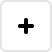
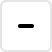
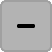
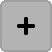
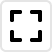
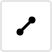
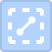
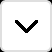
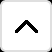
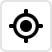
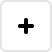
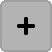
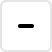
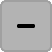
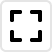
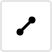
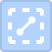
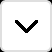
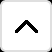
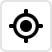

In [2]:
LetsPlot.setup_html()

##### Util for `PlotSpecDebugger.kt`

In [3]:
def dump_plot(plot, display=False):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True

    return plot

##### Data:

In [4]:
subj_short = ['CS', 'Math', 'Phys', 'Chem', 'Bio']
subj = ['Computer Science', 'Mathematics', 'Physic', 'Chemistry', 'Biology']
john = {
    'subj_short': subj_short,
    'subj': subj,
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['John'] * 5,
    'score': [19, 15, 18, 12, 9]
}

bob = {
    'subj_short': subj_short,
    'subj': subj,
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['Bob'] * 5,
    'score': [7, 18, 10, 18, 19]
}

def merge(dest, other):
    for k, v in other.items():
        list = dest.get(k, [])
        list.extend(v)
        list.append(v[0]) # close path
        dest[k] = list


radar_df = {}
merge(radar_df, john)
merge(radar_df, bob)

### Minimal radar plot

In [5]:
p = ggplot(radar_df, aes(x='subj_short', y='score', color='student')) \
    + coord_polar(ylim=[0, 20]) \
    + theme(
        axis_ticks_y=element_blank(), 
        axis_title_y=element_blank(),
        axis_title_x=element_blank(),
        axis_tooltip=element_blank(),
    )

def radar_plot(df):
    p = ggplot(df) \
        + geom_path(aes(x='subj_short', y='score', color='student'), flat=True, tooltips='none') \
        + geom_point(aes(x='subj_short', y='score', color='student'), tooltips=layer_tooltips().title("@student").line("Subject|@subj").line("Score|@score")) \
        + coord_polar(ylim=[0, 20]) \
        + theme(
            axis_ticks_y=element_blank(), 
            axis_title_y=element_blank(),
            axis_title_x=element_blank(),
            axis_tooltip=element_blank(),
        )
    return p

p + geom_path(flat=True, tooltips='none') \
    + geom_point(tooltips=layer_tooltips().title("@student").line("Subject|@subj").line("Score|@score"))

### Issues:

In [6]:
p + aes(x='subj', y='score', color='student') + geom_path(flat=True, tooltips='none') \
    + geom_point(tooltips=layer_tooltips().title("@student").line("Subject|@subj").line("Score|@score"))

1. Long names get rotated
2. Double tooltip on Computer Science
3. Plot is aligned to top, leaving large empty space at bottom